# Import Library & Import Dataset

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras
from tabulate import tabulate

In [ ]:
# menginput file dataset ke dalam colab
link = 'https://raw.githubusercontent.com/inggritrs/simplecartapp/main/Bali_2015-2022.csv'
data = pd.read_csv(link)
data.head()

,datetime,total_visitor,total_accomodation
0,1/1/2014,279257,16495
1,2/1/2014,275795,17221
2,3/1/2014,276573,17330
3,4/1/2014,280096,17737
4,5/1/2014,286033,18836


# Processing Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            108 non-null    object
 1   total_visitor       108 non-null    int64 
 2   total_accomodation  108 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


In [ ]:
data.isna().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

In [ ]:
print(data.head())

   datetime  total_visitor  total_accomodation
0  1/1/2014         279257               16495
1  2/1/2014         275795               17221
2  3/1/2014         276573               17330
3  4/1/2014         280096               17737
4  5/1/2014         286033               18836


In [ ]:
train_datetime = data['datetime']
print(train_datetime)

0       1/1/2014
1       2/1/2014
2       3/1/2014
3       4/1/2014
4       5/1/2014
         ...    
103     8/1/2022
104     9/1/2022
105    10/1/2022
106    11/1/2022
107    12/1/2022
Name: datetime, Length: 108, dtype: object


In [ ]:
input_col = list(data)[1:3]
print(input_col)

['total_visitor', 'total_accomodation']


In [ ]:
data_for_training = data[input_col]

In [ ]:
data_for_training.isna().sum()

total_visitor         0
total_accomodation    0
dtype: int64

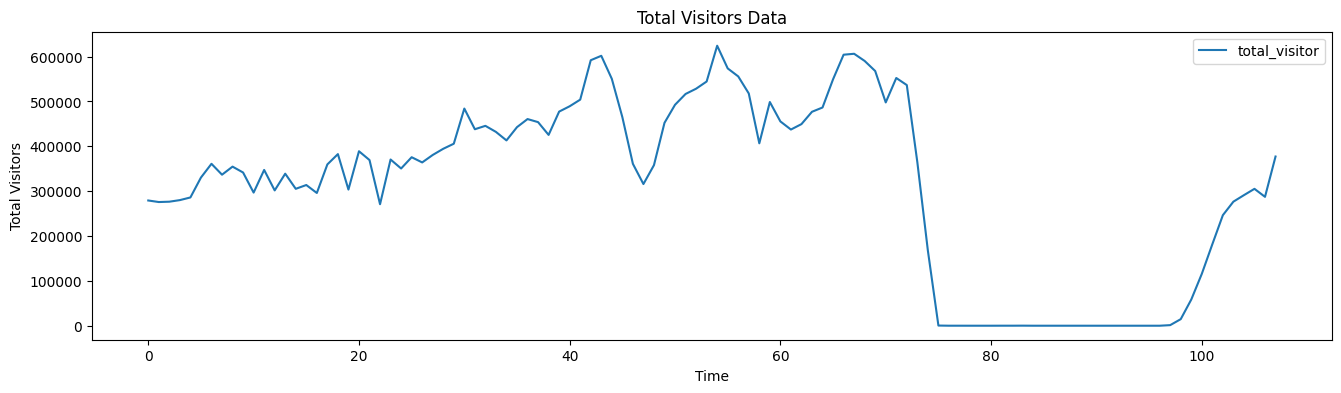

In [ ]:
# visualisasi data total visitors
data.plot(y='total_visitor', figsize=(16, 4), legend=True)
plt.title('Total Visitors Data')
plt.xlabel('Time')
plt.ylabel('Total Visitors')
plt.show()

In [ ]:
# NNormailsasi data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_training)

In [ ]:
# Assuming 'original' contains the original data with 'Datetime' and 'total_visitor' columns
original = data[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']

<ipython-input-367-6b11e8758d41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


# Scenario 1 - 80% Train - 20% Test

In [ ]:
# Define sequence length and features
sequence_length = 12  # Number of time steps in each sequence
num_features = len(data_for_training.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][1]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (76, 12, 2)
Train Y shape: (76,)
Test X shape: (20, 12, 2)
Test Y shape: (20,)


In [ ]:
# Definisi model RNN
model = Sequential()
model.add(SimpleRNN(120, activation='tanh', return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(60, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(30, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_218 (SimpleRNN)  (None, 12, 120)           14760     
                                                                 
 dropout_209 (Dropout)       (None, 12, 120)           0         
                                                                 
 simple_rnn_219 (SimpleRNN)  (None, 12, 60)            10860     
                                                                 
 dropout_210 (Dropout)       (None, 12, 60)            0         
                                                                 
 simple_rnn_220 (SimpleRNN)  (None, 30)                2730      
                                                                 
 dropout_211 (Dropout)       (None, 30)                0         
                                                                 
 dense_72 (Dense)            (None, 1)               

Epoch 1/100
3/3 [==============================] - 3s 13ms/step - loss: 0.0066
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0060
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0060
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0077
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0070
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0065
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0068
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0058
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0071
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 11/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0043
Epoch 12/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0055
Epoch 13/100
3/3 [==============================]

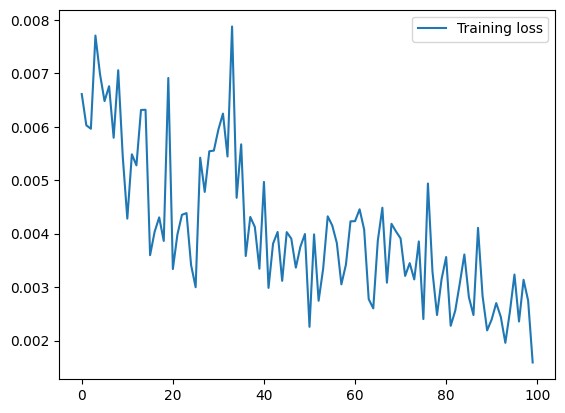

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(train_x, train_y, epochs=100, batch_size=32,  verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [ ]:
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction = model.predict(train_x[-n_month_for_prediction:])
mse = mean_squared_error(train_y[-n_month_for_prediction:], prediction)
fmape = np.mean(np.abs((mse) / prediction)) * 100
mape = f"{(fmape*100):.2f}%"
mae = np.mean(np.abs((mse) / prediction))

print("MSE:", mse)
print("MAPE:", mape)
print("MAE:", mae)

1/1 [==============================] - 0s 350ms/step
MSE: 0.00010342027218442563
MAPE: 1.44%
MAE: 0.00014419122


In [ ]:
prediction_copies = np.repeat(prediction, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

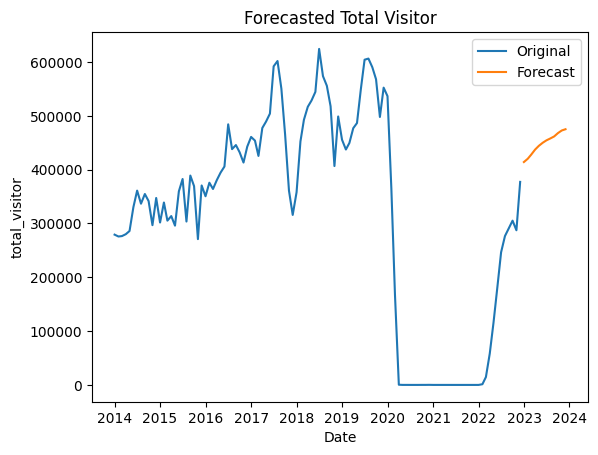

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │       414184 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │       420264 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       428019 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │       437338 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       444278 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       449991 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       454486 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │       457973 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │       461760 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       467881 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       472805 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates_1 = []

for time_i in predict_period_month:
    forecast_dates_1.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates_1, 'Total Visitor': y_pred_future})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='Total Visitor', label='Forecast')

plt.xlabel('Date')
plt.ylabel('total_visitor')
plt.title('Forecasted Total Visitor')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, y_pred_future))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

# Scenario 2 - 70% Train - 30% Test

In [ ]:
# Define sequence length and features
sequence_length2 = 12  # Number of time steps in each sequence
num_features2 = len(data_for_training.columns)

# Create sequences and corresponding labels
sequences2 = []
labels2 = []
for i in range(len(scaled_data) - sequence_length2):
    seq = scaled_data[i:i+sequence_length2]
    label = scaled_data[i+sequence_length2][1]  # '_tempm' column index
    sequences2.append(seq)
    labels2.append(label)

# Convert to numpy arrays
sequences2 = np.array(sequences2)
labels2 = np.array(labels2)

# Split into train and test sets
train_size2 = int(0.7 * len(sequences2))
train_x2, test_x2 = sequences2[:train_size2], sequences2[train_size2:]
train_y2, test_y2 = labels2[:train_size2], labels2[train_size2:]

print("Train X2 shape:", train_x2.shape)
print("Train Y2 shape:", train_y2.shape)
print("Test X2 shape:", test_x2.shape)
print("Test Y2 shape:", test_y2.shape)

Train X2 shape: (67, 12, 2)
Train Y2 shape: (67,)
Test X2 shape: (29, 12, 2)
Test Y2 shape: (29,)


In [ ]:
# Definisi model RNN
model2 = Sequential()
model2.add(SimpleRNN(120, activation='tanh', return_sequences=True, input_shape=(train_x2.shape[1], train_x2.shape[2])))
model2.add(Dropout(0.2))
model2.add(SimpleRNN(60, activation='tanh', return_sequences=True))
model2.add(Dropout(0.2))
model2.add(SimpleRNN(30, activation='tanh', return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_224 (SimpleRNN)  (None, 12, 120)           14760     
                                                                 
 dropout_215 (Dropout)       (None, 12, 120)           0         
                                                                 
 simple_rnn_225 (SimpleRNN)  (None, 12, 60)            10860     
                                                                 
 dropout_216 (Dropout)       (None, 12, 60)            0         
                                                                 
 simple_rnn_226 (SimpleRNN)  (None, 30)                2730      
                                                                 
 dropout_217 (Dropout)       (None, 30)                0         
                                                                 
 dense_74 (Dense)            (None, 1)               

Epoch 1/100
3/3 [==============================] - 3s 15ms/step - loss: 0.0129
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0199
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0302
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0136
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0128
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0210
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0234
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0142
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0152
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0116
Epoch 11/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0163
Epoch 12/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0122
Epoch 13/100
3/3 [==============================]

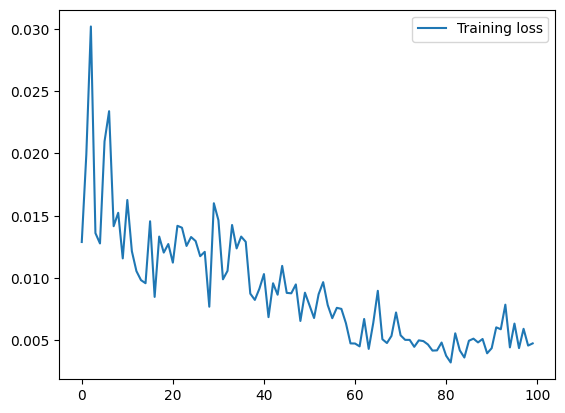

In [ ]:
# Kompilasi model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Pelatihan model
history2 = model2.fit(train_x2, train_y2, epochs=100, batch_size=32)
plt.plot(history2.history['loss'], label='Training loss')
plt.legend()

In [ ]:
n_past2 = 1
n_month_for_prediction2 = 12
predict_period_month2 = pd.date_range(list(train_datetime)[-n_past2], periods=n_month_for_prediction2, freq='M').tolist()
print(predict_period_month2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction2 = model2.predict(train_x2[-n_month_for_prediction2:])
mse2 = mean_squared_error(train_y2[-n_month_for_prediction2:], prediction2)
fmape2 = np.mean(np.abs((mse2) / prediction2)) * 100
mape2 = f"{(fmape2*100):.2f}%"
mae2 = np.mean(np.abs((mse2) / prediction2))

print("MSE:", mse2)
print("MAPE:", mape2)
print("MAE:", mae2)

1/1 [==============================] - 0s 354ms/step
MSE: 0.00016632324486277352
MAPE: 2.60%
MAE: 0.000260217


In [ ]:
prediction_copies2 = np.repeat(prediction2, data_for_training.shape[1], axis=-1)
y_pred_future2 = scaler.inverse_transform(prediction_copies2)[:,0]

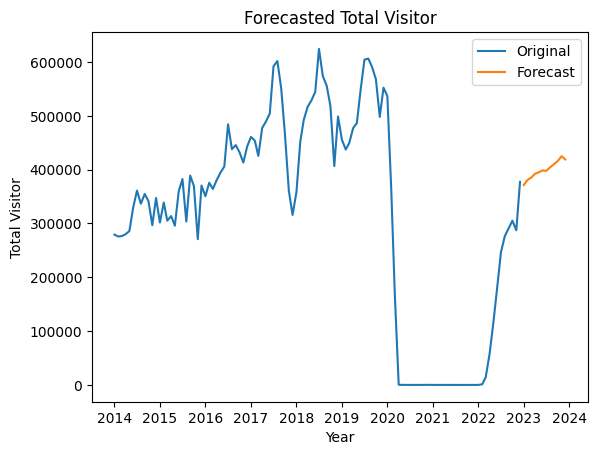

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │       371414 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │       381141 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       385065 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │       392356 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       395005 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       398637 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       397699 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │       404502 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │       410178 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       416112 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       425030 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates_2 = []

for time_i in predict_period_month2:
    forecast_dates_2.append(time_i.date())

df_forecast_2 = pd.DataFrame({'Date': forecast_dates_2, 'Total Visitor': y_pred_future2})
df_forecast_2['Date'] = pd.to_datetime(df_forecast_2['Date'])

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_2, x='Date', y='Total Visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Forecasted Total Visitor')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data2 = list(zip(forecast_dates_2, y_pred_future2))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table2 = tabulate(data2, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table2)

# Scenario 3 - 60% Train - 40% Test

In [ ]:
# Define sequence length and features
sequence_length3 = 12  # Number of time steps in each sequence
num_features3 = len(data_for_training.columns)

# Create sequences and corresponding labels
sequences3 = []
labels3 = []
for i in range(len(scaled_data) - sequence_length3):
    seq = scaled_data[i:i+sequence_length3]
    label = scaled_data[i+sequence_length3][1]  # '_tempm' column index
    sequences3.append(seq)
    labels3.append(label)

# Convert to numpy arrays
sequences3 = np.array(sequences3)
labels3 = np.array(labels3)

# Split into train and test sets
train_size3 = int(0.6 * len(sequences3))
train_x3, test_x3 = sequences3[:train_size3], sequences3[train_size3:]
train_y3, test_y3 = labels3[:train_size3], labels3[train_size3:]

print("Train X3 shape:", train_x3.shape)
print("Train Y3 shape:", train_y3.shape)
print("Test X3 shape:", test_x3.shape)
print("Test Y3 shape:", test_y3.shape)

Train X3 shape: (57, 12, 2)
Train Y3 shape: (57,)
Test X3 shape: (39, 12, 2)
Test Y3 shape: (39,)


In [ ]:
# Definisi model RNN
model3 = Sequential()
model3.add(SimpleRNN(120, activation='tanh', return_sequences=True, input_shape=(train_x3.shape[1], train_x3.shape[2])))
model3.add(Dropout(0.2))
model3.add(SimpleRNN(60, activation='tanh', return_sequences=True))
model3.add(Dropout(0.2))
model3.add(SimpleRNN(30, activation='tanh', return_sequences=False))
model3.add(Dropout(0.2))
model3.add(Dense(1))

model3.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_233 (SimpleRNN)  (None, 12, 120)           14760     
                                                                 
 dropout_224 (Dropout)       (None, 12, 120)           0         
                                                                 
 simple_rnn_234 (SimpleRNN)  (None, 12, 60)            10860     
                                                                 
 dropout_225 (Dropout)       (None, 12, 60)            0         
                                                                 
 simple_rnn_235 (SimpleRNN)  (None, 30)                2730      
                                                                 
 dropout_226 (Dropout)       (None, 30)                0         
                                                                 
 dense_77 (Dense)            (None, 1)               

Epoch 1/100
2/2 [==============================] - 4s 35ms/step - loss: 0.0862
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 0.1140
Epoch 3/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0671
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0674
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0798
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0756
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0605
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0592
Epoch 9/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0665
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0780
Epoch 11/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0556
Epoch 12/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0801
Epoch 13/100
2/2 [==============================]

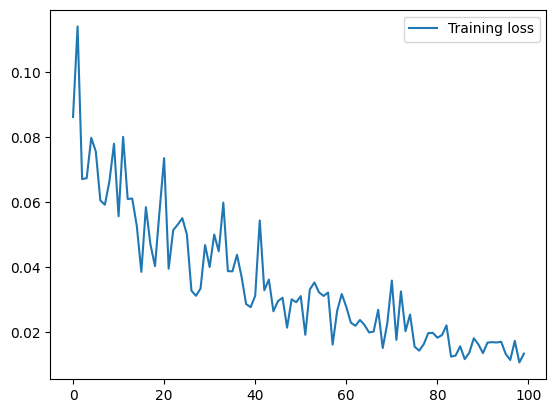

In [ ]:
# Kompilasi model
model3.compile(optimizer='adam', loss='mean_squared_error')

# Pelatihan model
history3 = model3.fit(train_x3, train_y3, epochs=100, batch_size=32)

plt.plot(history3.history['loss'], label='Training loss')
plt.legend()

In [ ]:
# Predict for 12 month afterwards
n_past3 = 1
n_month_for_prediction3 = 12
predict_period_month3 = pd.date_range(list(train_datetime)[-n_past3], periods=n_month_for_prediction3, freq='M').tolist()
print(predict_period_month3)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
prediction3 = model3.predict(train_x3[-n_month_for_prediction3:])
mse3 = mean_squared_error(train_y3[-n_month_for_prediction3:], prediction3)
fmape3 = np.mean(np.abs((mse3) / prediction3)) * 100
mape3 = f"{(fmape3*100):.2f}%"
mae3 = np.mean(np.abs((mse3) / prediction3))

print("MSE:", mse3)
print("MAPE:", mape3)
print("MAE:", mae3)

1/1 [==============================] - 0s 345ms/step
MSE: 0.00015325012192635382
MAPE: 2.84%
MAE: 0.00028446948


In [ ]:
prediction_copies3 = np.repeat(prediction3, data_for_training.shape[1], axis=-1)
y_pred_future3 = scaler.inverse_transform(prediction_copies3)[:,0]

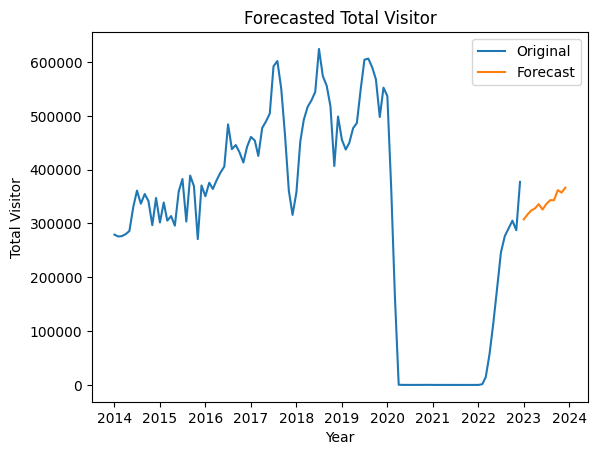

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │       307638 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │       316874 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       324071 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │       328029 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       335907 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       325874 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       336187 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │       343235 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │       343290 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       361909 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       357382 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates_3 = []

for time_i in predict_period_month3:
    forecast_dates_3.append(time_i.date())

df_forecast_3 = pd.DataFrame({'Date': forecast_dates_3, 'Total Visitor': y_pred_future3})
df_forecast_3['Date'] = pd.to_datetime(df_forecast_3['Date'])

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_3, x='Date', y='Total Visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Forecasted Total Visitor')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_3 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data3 = list(zip(forecast_dates_3, y_pred_future3))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table3 = tabulate(data3, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table3)

# Conclusion

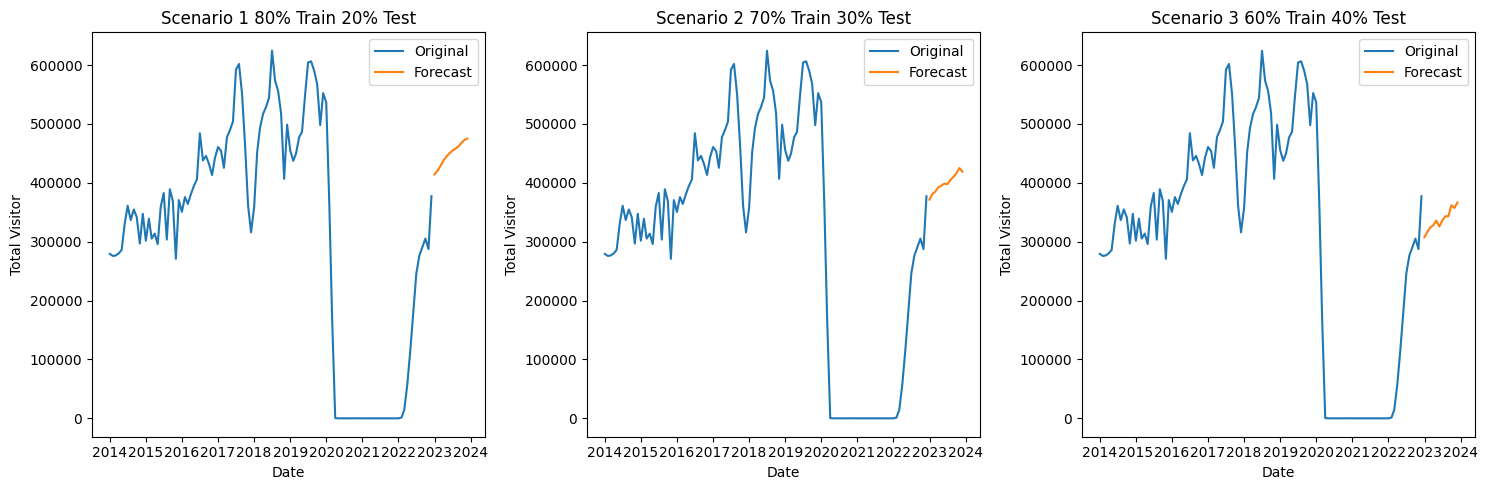

╒════════════╤═════════╤═════════════╤═════════════╤════════╕
│ Scenario   │ Model   │         MAE │         MSE │ MAPE   │
╞════════════╪═════════╪═════════════╪═════════════╪════════╡
│ Scenario 1 │ RNN     │ 0.000144191 │ 0.00010342  │ 1.44%  │
├────────────┼─────────┼─────────────┼─────────────┼────────┤
│ Scenario 2 │ RNN     │ 0.000260217 │ 0.000166323 │ 2.60%  │
├────────────┼─────────┼─────────────┼─────────────┼────────┤
│ Scenario 3 │ RNN     │ 0.000284469 │ 0.00015325  │ 2.84%  │
╘════════════╧═════════╧═════════════╧═════════════╧════════╛


In [ ]:
plt.figure(figsize=(15, 5))

# Scenario 1
plt.subplot(1, 3, 1)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='Total Visitor', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.title('Scenario 1 80% Train 20% Test')
plt.legend()

# Scenario 2
plt.subplot(1, 3, 2)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_2, x='Date', y='Total Visitor', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.title('Scenario 2 70% Train 30% Test')
plt.legend()

# Scenario 3
plt.subplot(1, 3, 3)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast_3 , x='Date', y='Total Visitor', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total Visitor')
plt.title('Scenario 3 60% Train 40% Test')
plt.legend()

plt.tight_layout()
plt.show()

# Define the data for each scenario
scenario_data = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'RNN',
        'MAE': mae,
        'MSE': mse,
        'MAPE': mape
    },
    {
        'Scenario': 'Scenario 2',
        'Model': 'RNN',
        'MAE': mae2,
        'MSE': mse2,
        'MAPE': mape2
    },
    {
        'Scenario': 'Scenario 3',
        'Model': 'RNN',
        'MAE': mae3,
        'MSE': mse3,
        'MAPE': mape3
    }
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(scenario_data)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table4 = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table4)